Αυτο το εγγραφο ειναι η επεξηγηση του αποσπασματικου κωδικα και μερος της εργασιας 
κωδικας εργασιας: https://github.com/jinspax/IR_2024-25

#1ο Βημα:

Το πρωτο βημα στα αποσπασματα του κωδικα ειναι να ανακτησουμε δεδομενα απο τις ιστοσελιδες που επιλεξαμε
Στο jupiter δεν τρεχει αλλα τρεχει τοπικα :)

In [9]:
import requests
from bs4 import BeautifulSoup
import csv

# List of URLs to scrape
urls = [
    "https://en.wikipedia.org/wiki/Dungeons_%26_Dragons",
    "https://en.wikipedia.org/wiki/Underdark",
    "https://en.wikipedia.org/wiki/Drizzt_Do%27Urden",
    "https://en.wikipedia.org/wiki/The_Legend_of_Drizzt",
    "https://en.wikipedia.org/wiki/Faer%C3%BBn",
    "https://en.wikipedia.org/wiki/Forgotten_Realms"
]

# Corresponding output CSV filenames
output_csv = [
    "DungeonsDragons.csv",
    "Underdark.csv",
    "DrizztDoUrden.csv",
    "DrizztSeries.csv",
    "Faerun.csv",
    "ForgottenRealms.csv"
]

# Function to scrape words from a URL and save them to a CSV file
def scrape_words_to_csv(url, output_csv):
    try:
        # Step 1: Send a GET request to the URL
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad responses

        # Step 2: Parse the HTML content
        soup = BeautifulSoup(response.content, "html.parser")

        # Step 3: Extract all texts from the page
        word_list = []
        for tag in soup.find_all():
            text = tag.get_text(strip=True)  # Get text from each tag
            if text:  # Ensure the text is not empty
                words = text.split()  # Split text into individual words
                word_list.extend(words)

        # Step 4: Remove duplicates and sort words (optional)
        unique_word_list = sorted(set(word_list))
        
        # Step 5: Save the words to a CSV file
        with open(output_csv, mode="w", newline="", encoding="utf-8") as file:
            writer = csv.writer(file)
            writer.writerow(["WordList"])
            for word in unique_word_list:
                writer.writerow([word])

        print(f"Words successfully saved to {output_csv}")

    except requests.exceptions.RequestException as e:
        print(f"Error fetching the URL: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")

# Main block to loop through URLs and filenames
if __name__ == "__main__":
    for i in range(len(urls)):  # Use range based on the length of `urls`
        scrape_words_to_csv(urls[i], output_csv[i])


Error fetching the URL: ('Connection aborted.', HTTPException("Failed to execute 'send' on 'XMLHttpRequest': Failed to load 'https://en.wikipedia.org/wiki/Dungeons_%26_Dragons'."))
Error fetching the URL: ('Connection aborted.', HTTPException("Failed to execute 'send' on 'XMLHttpRequest': Failed to load 'https://en.wikipedia.org/wiki/Underdark'."))
Error fetching the URL: ('Connection aborted.', HTTPException("Failed to execute 'send' on 'XMLHttpRequest': Failed to load 'https://en.wikipedia.org/wiki/Drizzt_Do%27Urden'."))
Error fetching the URL: ('Connection aborted.', HTTPException("Failed to execute 'send' on 'XMLHttpRequest': Failed to load 'https://en.wikipedia.org/wiki/The_Legend_of_Drizzt'."))
Error fetching the URL: ('Connection aborted.', HTTPException("Failed to execute 'send' on 'XMLHttpRequest': Failed to load 'https://en.wikipedia.org/wiki/Faer%C3%BBn'."))
Error fetching the URL: ('Connection aborted.', HTTPException("Failed to execute 'send' on 'XMLHttpRequest': Failed to

Ο παραπανω κωδικας χρησημοποιει το Beautiful Soup για να εξαγει ιστοσελιδες 
Συγκεκριμενα στο #Step 3 
παιρνει ολα τα tags <> </> και τα αποθηκευει.
μας δινει ενα αποτελεσμα: 


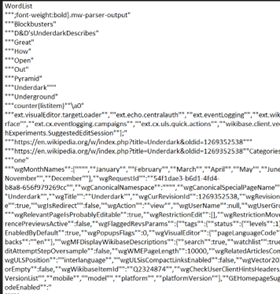

In [3]:
from IPython.display import Image, display

# Display an image
img_path = "Picture1.png"  # Path to your image
display(Image(filename=img_path))

Πρεπει να επεξεργαστουμε τα δεδομενα μας οι μεθοδοι που ακολουθησαμε ειναι: Special Character Removal, Delete Stopwords, Delete long words and numbers, Stemming
ο λογος για το stemming και οχι το lemmatization ειναι οτι δεν μας νοιαζει, εν προκειμενου, η ριζα του κειμενου να περιεχει εννοιολογικο υποβαθρο

#Βημα 2
Preprocessing

In [ ]:
import pandas as pd
import re
import os
from nltk.corpus import stopwords

In [ ]:
def process_text_files(filenames, output_dir, column_name):

    # Ensure NLTK stopwords are available
    stop_words = set(stopwords.words('english'))

    def process_text(text):
        if pd.isna(text):  # Check for NaN values
            return ""

        #Επειδη ειχαμε τυχον Float καταγραφες επρεπε να γινουν text
        text = str(text)

        # Ειδικη διαχειρηση για ειδικους χαρακτηρες
        text = re.sub(r"[^a-zA-Z\s]", "", text) 

        # Σε κανεναν δεν αρεσουν 
        words = text.split()
        filtered_words = [word for word in words if word.lower() not in stop_words]

        # Διαχωρηση λεξεων ανω των 16 χαρακτηρων
        filtered_words = [word for word in filtered_words if len(word) <= 16]

        # Διαχωρηση κενων
        return " ".join(filtered_words).strip()

 


In [ ]:
#Δημιουργια και αποθηκευση του αρχειου μας
    os.makedirs(output_dir, exist_ok=True)

    for filename in filenames:
        df = pd.read_csv(filename)

        
        if df[column_name].dtypes != 'object' and df[column_name].dtypes != 'str':
            df[column_name] = df[column_name].astype(str)
        
        df[column_name] = df[column_name].apply(process_text)
        
        df = df[df[column_name] != ""]
        
        output_path = os.path.join(output_dir, os.path.basename(filename))
        
        df.to_csv(output_path, index=False)

Παμε για τρεξημο!

In [ ]:
filenames = [
    "DungeonsDragons.csv", "Underdark.csv", "DrizztDoUrden.csv",
    "DrizztSeries.csv", "Faerun.csv", "ForgottenRealms.csv"
]
output_dir = "ProcessedFiles"
text_column = "WordList"

process_text_files(filenames, output_dir, text_column)

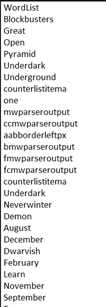

In [10]:
from IPython.display import Image, display

# Display an image
img_path = "Picture2.png"  # Path to your image
display(Image(filename=img_path))

#Βημα 3
Δημιουργια Inverted index για την αποθηκευση των δεδομενων χρησημοποιησαμε Dictionary και για να το οπτικοποιησουμε το βαλαμε σε ενα .csv
Τα αποτελεσματα ειναι οπως τα θελαμε, φτιαξαμε τα δεδομενα που χρειαζομαστε και ειμαστε ετοιμοι να τρεξουμε αλγοριθμους

In [ ]:
import csv
from collections import defaultdict
import os

def build_inverted_index_from_csv(folder_path):
    
    inverted_index = defaultdict(set)

    # List of filenames to process
    filenames = [
        "DungeonsDragons.csv", "Underdark.csv", "DrizztDoUrden.csv", 
        "DrizztSeries.csv", "Faerun.csv", "ForgottenRealms.csv"
    ]

    for filename in filenames:
        file_path = os.path.join(folder_path, filename)
        document_id = filename  # Use the file name as the document ID

        # Read words from the CSV file
        with open(file_path, mode="r", encoding="utf-8") as file:
            reader = csv.reader(file)
            for row in reader:
                # Assume each row contains a single word
                for word in row:
                    if word.strip():  # Avoid empty words
                        inverted_index[word.strip()].add(document_id)

    return inverted_index

# Example usage
if __name__ == "__main__":
    folder_path = "C:/Users/ntino/Desktop/IR_Project"  # Replace with your folder path

    # Build the inverted index and store it in a hash map
    inverted_index = build_inverted_index_from_csv(folder_path)

    # Save the inverted index to a CSV file
    output_file = "Inv_Indx.csv"
    with open(output_file, mode="w", encoding="utf-8", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(["Word", "Documents"])  # Header row
        for word, documents in inverted_index.items():
            writer.writerow([word, ", ".join(documents)])  # Save document IDs as a comma-separated string

    print(f"Inverted index saved to {output_file}")


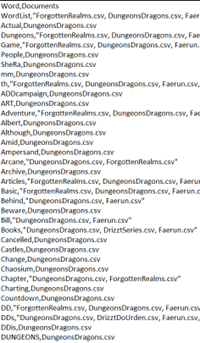

In [11]:
from IPython.display import Image, display

# Display an image
img_path = "Picture3.png"  # Path to your image
display(Image(filename=img_path))

#Βημα 4ο
A) Το επομενο βημα ειναι να φτιαξουμε την μηχανη αναζητησης και
B) να τρεξουμε αλγοριθμους (TF - IDF) για να δοκιμασουμε την αντιπροσωπευτικοτητα μιας λεξης ως προς το συνολο των εγγραφων

In [ ]:
import os
import pandas as pd
from collections import defaultdict

# Path όπου βρίσκονται τα CSV αρχεία
base_path = r"C:\Users\Tour\Desktop\IR_Project"

# Ονόματα αρχείων CSV
filenames = [
    "DungeonsDragons.csv",
    "Underdark.csv",
    "DrizztDoUrden.csv",
    "DrizztSeries.csv",
    "Faerun.csv",
    "ForgottenRealms.csv",
]

#INVERTED_INDEX

# Δημιουργία λεξικού εγγράφων με το όνομα αρχείου
documents = {}
file_mapping = {}  # Χαρτογράφηση του doc_id σε filename
doc_id = 1  # Ξεκινάμε τα IDs από το 1

for filename in filenames:
    file_path = os.path.join(base_path, filename)  # Συνδυασμός path και filename
    try:
        df = pd.read_csv(file_path)

        # Υποθέτουμε ότι η στήλη 'WordList' περιέχει το κείμενο
        for WordList in df["WordList"]:
            documents[doc_id] = WordList
            file_mapping[doc_id] = filename  # Αποθήκευση του ονόματος αρχείου για το doc_id
            doc_id += 1
    except Exception as e:
        print(f"Σφάλμα κατά τη φόρτωση του αρχείου {filename}: {e}")

# Συνάρτηση για τη δημιουργία ανεστραμμένου ευρετηρίου
def build_inverted_index(documents):
    inverted_index = defaultdict(set)
    for doc_id, content in documents.items():
        tokens = content.lower().split()  # Tokenization
        for token in tokens:
            inverted_index[token].add(doc_id)
    return inverted_index

# Δημιουργία ανεστραμμένου ευρετηρίου
inverted_index = build_inverted_index(documents)

#QUERY_PROCESSING

# Συνάρτηση για την επεξεργασία ερωτημάτων με Boolean λογική
def process_query(query, inverted_index):
    terms = query.lower().split()  # Διαχωρισμός λέξεων (tokenization)
    result_set = set()  # Αρχικοποίηση του συνόλου αποτελεσμάτων
    current_set = set()  # Προσωρινό σύνολο για λειτουργίες

    operator = None  # Αποθήκευση του τελευταίου τελεστή
    for term in terms:
        if term in ["and", "or", "not"]:  # Έλεγχος για Boolean τελεστές
            operator = term
        else:
            current_set = inverted_index.get(term, set())  # Λήψη εγγράφων για τον όρο

            # Εφαρμογή Boolean λογικής ανάλογα με τον τελεστή
            if operator == "and":
                result_set &= current_set
            elif operator == "or":
                result_set |= current_set
            elif operator == "not":
                result_set -= current_set
            else:  # Ο πρώτος όρος αρχικοποιεί το σύνολο αποτελεσμάτων
                result_set = current_set

    return result_set

#USER_INTERFACE

# Διεπαφή γραμμής εντολών για ερωτήματα χρηστών
print("Καλώς ήρθατε στον Επεξεργαστή Ερωτημάτων!")
while True:
    query = input("Εισάγετε το ερώτημά σας (ή 'exit' για έξοδο): ")
    if query.lower() == "exit":
        print("Ευχαριστούμε που χρησιμοποιήσατε τον επεξεργαστή!")
        break
    results = process_query(query, inverted_index)  # Επεξεργασία του ερωτήματος
    if results:
        print(f"Βρέθηκαν αποτελέσματα για το '{query}' σε:")
        for doc_id in results:
            filename = file_mapping.get(doc_id, f"Άγνωστο αρχείο (ID: {doc_id})")
            occurrences = sum(1 for word in documents[doc_id].lower().split() if word == query.lower())
            print(f"- Αρχείο: {filename}, Εμφανίσεις: {occurrences}")
    else:
        print(f"Δεν βρέθηκαν σχετικά έγγραφα για το '{query}'.")



TF_IDF for excactly one word

In [ ]:
import csv
from collections import defaultdict
import os
import math

def build_inverted_index_from_csv(folder_path, filenames):
    inverted_index = defaultdict(set)
    term_frequencies = defaultdict(lambda: defaultdict(int))  # term -> document_id -> frequency
    
    # Read files and build the inverted index along with term frequencies
    for filename in filenames:      
        file_path = os.path.join(folder_path, filename)
        document_id = filename  # Use the file name as the document ID
        
        with open(file_path, mode="r", encoding="utf-8") as file:
            reader = csv.reader(file)
            for row in reader:
                for word in row:
                    word = word.strip()
                    if word:  # Avoid empty words
                        inverted_index[word].add(document_id)
                        term_frequencies[word][document_id] += 1
    
    return inverted_index, term_frequencies

def compute_idf(inverted_index, total_documents):
    idf = {}
    for word, docs in inverted_index.items():
        doc_count = len(docs)
        idf[word] = math.log(total_documents / (1 + doc_count))  # Adding 1 to avoid division by zero
    return idf

def compute_tfidf_for_word(term_frequencies, idf, word):
    tfidf_scores = {}
    
    # Only compute TF-IDF for the specific word in all documents
    for document_id, term_count in term_frequencies.get(word, {}).items():
        tf = term_count  # Term frequency
        idf_value = idf.get(word, 0)  # Default IDF value is 0 if the word doesn't exist
        tfidf_scores[document_id] = tf * idf_value
    
    return tfidf_scores

# Example usage
folder_path = "C:/Users/ntino/Desktop/IR_Project"  # Replace with your CSV folder path
word_of_interest = input("Enter Word: ")  # Change this to the word for which you want to compute TF-IDF

# List of all document filenames
filenames = ["DungeonsDragons.csv", "Underdark.csv", "DrizztDoUrden.csv", 
             "DrizztSeries.csv", "Faerun.csv", "ForgottenRealms.csv"]

# Step 1: Build inverted index and term frequencies
inverted_index, term_frequencies = build_inverted_index_from_csv(folder_path, filenames)

# Step 2: Compute IDF for each word
document_ids = set(doc for docs in inverted_index.values() for doc in docs)  # Get all unique document IDs
total_documents = len(document_ids)  # Correctly calculate the total number of documents
idf = compute_idf(inverted_index, total_documents)

# Step 3: Compute TF-IDF for the specific word across all documents
tfidf_scores = compute_tfidf_for_word(term_frequencies, idf, word_of_interest)

# Save the TF-IDF scores for the specific word to a CSV file
output_file = f"tfidf_scores_for_{word_of_interest}.csv"


print(tfidf_scores)

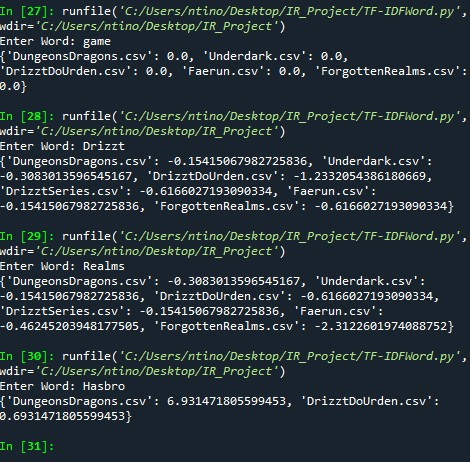

In [12]:
from IPython.display import Image, display

# Display an image
img_path = "Picture4.png"  # Path to your image
display(Image(filename=img_path))

Οπως μπορουμε να δουμε απο τον κωδικα που τρεξαμε για μια μοναδικη λεξη καποιες φορες:
η λεξη Hasbro αναφερεται μονο σε δυο εγγραφα και με μεγαλο σχετικα αριθμο
στις υπολοιπες εχουμε διαφορες τιμες αναλογως με την σχετικοτητα και την μοναδικοτητα στα εγγραφα
μια μεγαλη τιμη TF - IDF μας δινει την βεβαιοτητα οτι η λεξη στο κειμενο, με ψηλο δεικτη ειναι μοναδικη και χαρακτηριστικη